In [1]:
#import packages:

import numpy as np
import pandas as pd
import random
from random import sample
import os
import cv2
import math 

#statistical methods 
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

#plots
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
df_residuals_data = pd.read_csv(".../df_brains_res.csv")

df_original_data = pd.read_csv(".../df_brains_original.csv")

In [3]:
df_residuals_data = df_residuals_data.dropna()
df_original_data = df_original_data.dropna()

In [4]:
np.all(df_residuals_data.eid == df_original_data.eid)

True

In [5]:
random.seed(41)
number_of_males = sum(df_original_data.sex==1)
females_index = sample(np.where(df_original_data.sex==0)[0].tolist(),number_of_males)
males_index = np.where(df_original_data.sex==1)[0].tolist()
ind =  males_index + females_index 

In [6]:
number_of_males

8016

In [7]:
np.unique(ind).shape

(16032,)

In [8]:
number_of_females=number_of_males

In [9]:
df_residuals_data_balanced = df_residuals_data.iloc[ind,2:]
df_original_data_balanced = df_original_data.iloc[ind,2:]

In [10]:
scaler = StandardScaler()
df_residuals_data_balanced_norm = scaler.fit_transform(df_residuals_data_balanced)

In [11]:
df_residuals_data_balanced_norm.shape

(16032, 139)

In [12]:
scaler = StandardScaler()
df_original_data_balanced_norm = scaler.fit_transform(df_original_data_balanced)

In [13]:
df_original_data_balanced_norm.shape

(16032, 139)

<font size="5">Dimension reduction using PCA<font>

In [14]:
pca = PCA(svd_solver='full')
pca.fit(df_residuals_data_balanced_norm)

PCA(svd_solver='full')

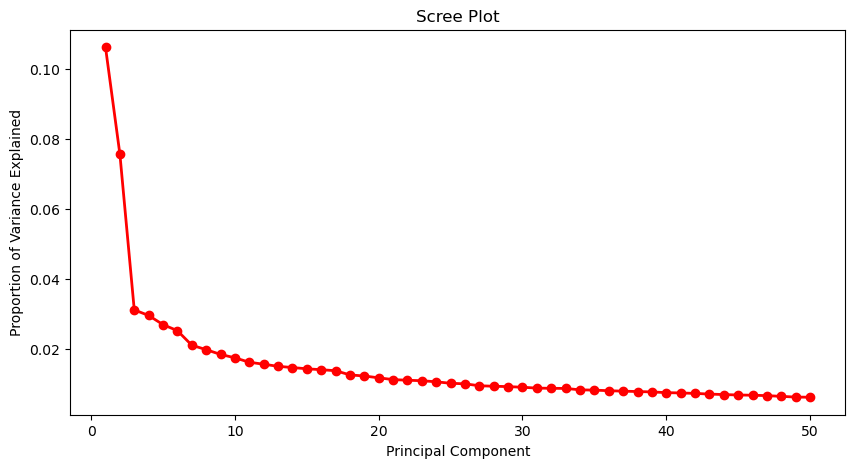

In [15]:
plt.figure(figsize=(10,5))
PC_values = (np.arange(pca.n_components_) + 1)[:50]
plt.plot(PC_values[:50], pca.explained_variance_ratio_[:50], 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

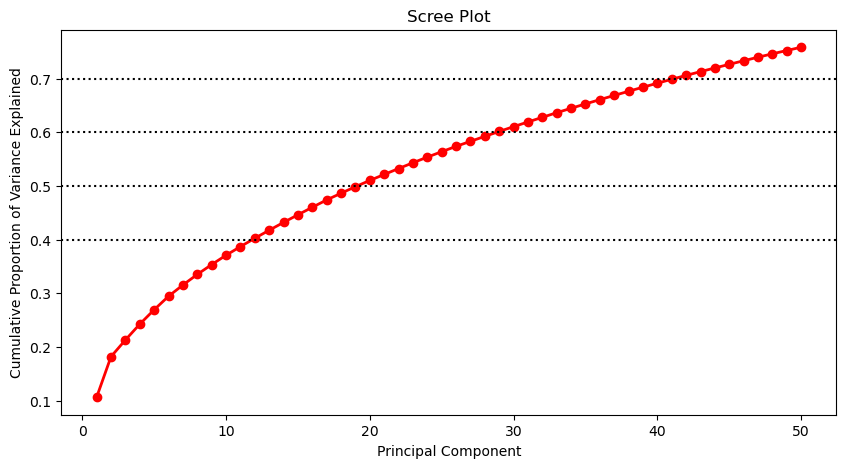

In [11]:
#create a plot to choose the number of dimensions 
plt.figure(figsize=(10,5))
PC_values = (np.arange(pca.n_components_) + 1)[:50]
plt.plot(PC_values[:50], np.cumsum(pca.explained_variance_ratio_)[:50], 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.axhline(y = 0.4, color = 'black', linestyle = ':')
plt.axhline(y = 0.5, color = 'black', linestyle = ':')
plt.axhline(y = 0.6, color = 'black', linestyle = ':')
plt.axhline(y = 0.7, color = 'black', linestyle = ':')
plt.show()

In [16]:
sum(pca.explained_variance_ratio_[:3]) #explained variance ratio of the first 3 pcs

0.21282234878376238

In [17]:
sum(pca.explained_variance_ratio_[:12]) #explained variance ratio of the first 12 pcs

0.40235167895510426

In [19]:
pca = PCA(svd_solver='full')
pca.fit(df_original_data_balanced_norm)

PCA(svd_solver='full')

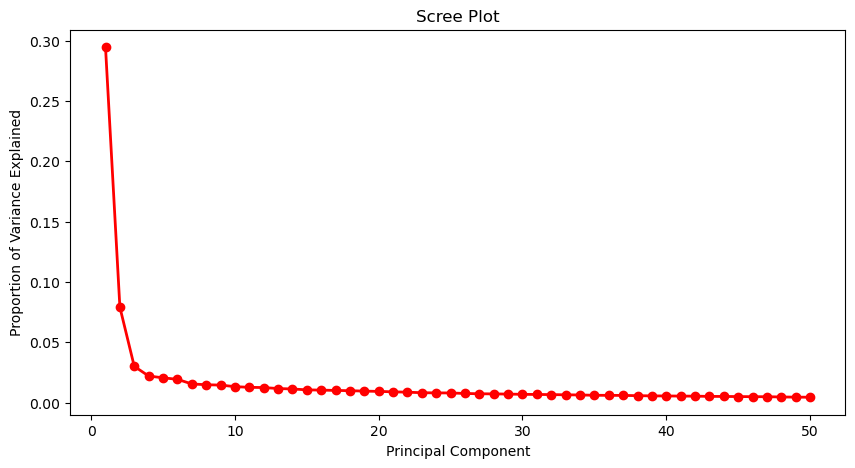

In [20]:
plt.figure(figsize=(10,5))
PC_values = (np.arange(pca.n_components_) + 1)[:50]
plt.plot(PC_values[:50], pca.explained_variance_ratio_[:50], 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

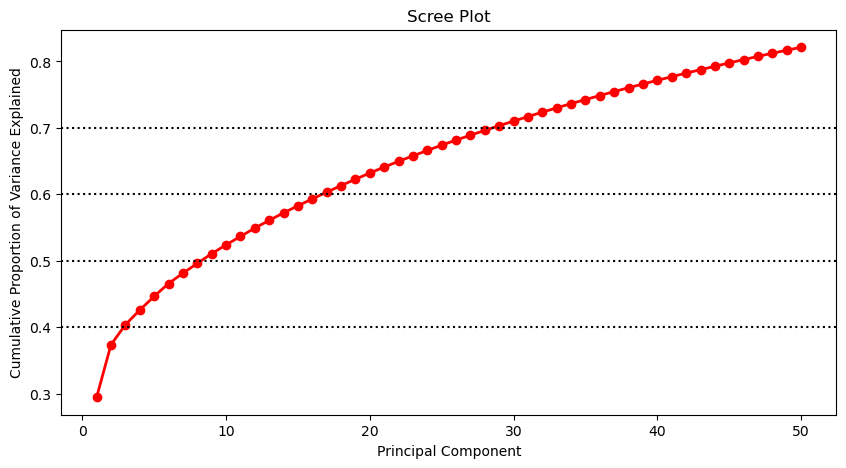

In [24]:
#create a plot to choose the number of dimensions 
plt.figure(figsize=(10,5))
PC_values = (np.arange(pca.n_components_) + 1)[:50]
plt.plot(PC_values[:50], np.cumsum(pca.explained_variance_ratio_)[:50], 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.axhline(y = 0.4, color = 'black', linestyle = ':')
plt.axhline(y = 0.5, color = 'black', linestyle = ':')
plt.axhline(y = 0.6, color = 'black', linestyle = ':')
plt.axhline(y = 0.7, color = 'black', linestyle = ':')
plt.show()

In [21]:
sum(pca.explained_variance_ratio_[:3]) #explained variance ratio of the first 3 pcs

0.4037530152627674

In [22]:
sum(pca.explained_variance_ratio_[:9]) #explained variance ratio of the first 9 pcs

0.5106488496304408

In [15]:
#performing pca using 3 components + scaling
pca = PCA(n_components = 3,svd_solver='full')
pca.fit(df_residuals_data_balanced_norm)
images_reduced_brains_res_not_std_3 = pca.transform(df_residuals_data_balanced_norm)
scaler = StandardScaler()
images_reduced_brains_res_3 = scaler.fit_transform(images_reduced_brains_res_not_std_3)

In [21]:
images_reduced_brains_res_3.shape

(16032, 3)

In [20]:
images_reduced_brains_res_not_std_3.shape

(16032, 3)

In [18]:
#performing pca using 12 components + scaling
pca = PCA(n_components = 12,svd_solver='full')
pca.fit(df_residuals_data_balanced_norm)
images_reduced_brains_res_not_std_12 = pca.transform(df_residuals_data_balanced_norm)
scaler = StandardScaler()
images_reduced_brains_res_12 = scaler.fit_transform(images_reduced_brains_res_not_std_12)

In [19]:
images_reduced_brains_res_12.shape

(16032, 12)

In [25]:
#performing pca using 3 components + scaling
pca = PCA(n_components = 3,svd_solver='full')
pca.fit(df_original_data_balanced_norm)
images_reduced_brains_original_not_std_3 = pca.transform(df_original_data_balanced_norm)
scaler = StandardScaler()
images_reduced_brains_original_3 = scaler.fit_transform(images_reduced_brains_original_not_std_3)

In [26]:
#performing pca using 9 components + scaling
pca = PCA(n_components = 9,svd_solver='full')
pca.fit(df_original_data_balanced_norm)
images_reduced_brains_original_not_std_9 = pca.transform(df_original_data_balanced_norm)
scaler = StandardScaler()
images_reduced_brains_original_9 = scaler.fit_transform(images_reduced_brains_original_not_std_9)

<font size="5">Using K-means and Hierarchical clustering methods - 2 clusters:</font>

In [34]:
ratio_of_females_in_the_largest_cluster = []
ratio_of_males_in_the_largest_cluster = []
clustering_method = []
dim_reduction_method = []


def clustering_2(df,number_of_females,method):
    kmeans = KMeans(n_clusters = 2, random_state = 0, n_init=100, init='random')
    kmeans.fit(df)
    km_largest_cluster = pd.Series([sum(kmeans.labels_==0),sum(kmeans.labels_==1)]).idxmax()
    ratio_of_females_in_the_largest_cluster.append(sum([kmeans.labels_[number_of_females:]==km_largest_cluster][0])/number_of_females)
    ratio_of_males_in_the_largest_cluster.append(sum([kmeans.labels_[:number_of_females]==km_largest_cluster][0])/number_of_females)
    clustering_method.append("K-means")
    dim_reduction_method.append(method)
    hierarchical_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
    labels_hierarchical_cluster = hierarchical_cluster.fit_predict(df)
    h_largest_cluster = pd.Series([sum(labels_hierarchical_cluster==0),sum(labels_hierarchical_cluster==1)]).idxmax()
    ratio_of_females_in_the_largest_cluster.append(sum([labels_hierarchical_cluster[number_of_females:]==h_largest_cluster][0])/number_of_females)
    ratio_of_males_in_the_largest_cluster.append(sum([labels_hierarchical_cluster[:number_of_females]==h_largest_cluster][0])/number_of_females)
    clustering_method.append("Hierarchical")
    dim_reduction_method.append(method)

In [35]:
clustering_2(images_reduced_brains_original_3,number_of_females,"Original Values PCA - 3")

clustering_2(images_reduced_brains_original_9,number_of_females,"Original Values PCA - 9")

clustering_2(df_original_data_balanced_norm,number_of_females,"Original Values")

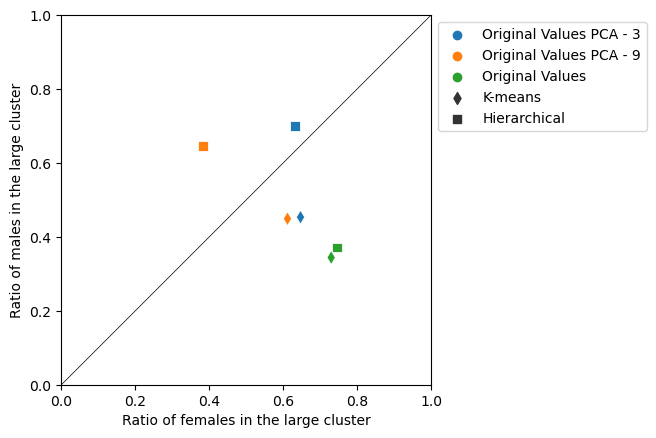

In [36]:
plot = sns.scatterplot(y=ratio_of_males_in_the_largest_cluster,x=ratio_of_females_in_the_largest_cluster,
                       hue=dim_reduction_method,
                        style=clustering_method, markers=["d","s"],s=50)
plot.set(xlabel='Ratio of females in the large cluster', ylabel='Ratio of males in the large cluster')
plt.axis('square')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.plot([0, 1], [0, 1],color='black', linewidth=0.5)
legend = plot.legend(bbox_to_anchor= (1,1))
plt.savefig('.../2 clusters - original data- brains.png',dpi=300, bbox_inches='tight')
plt.show()

In [37]:
ratio_of_females_in_the_largest_cluster = []
ratio_of_males_in_the_largest_cluster = []
clustering_method = []
dim_reduction_method = []

clustering_2(images_reduced_brains_res_3,number_of_females,"Residuals PCA - 3")

clustering_2(images_reduced_brains_res_12,number_of_females,"Residuals PCA - 12")

clustering_2(df_residuals_data_balanced_norm,number_of_females,"Residuals")

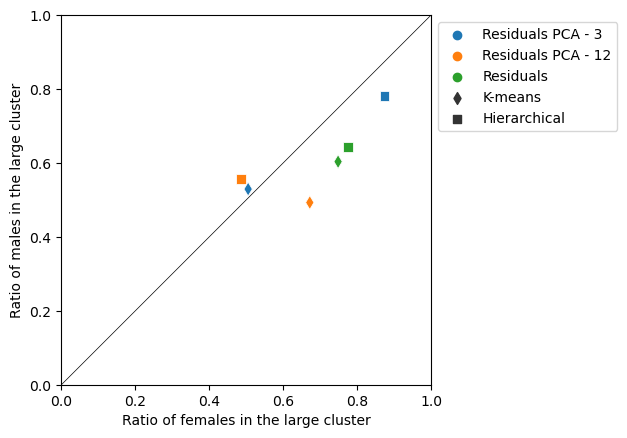

In [38]:
plot = sns.scatterplot(y=ratio_of_males_in_the_largest_cluster,x=ratio_of_females_in_the_largest_cluster,
                       hue=dim_reduction_method,
                        style=clustering_method, markers=["d","s"],s=50)
plot.set(xlabel='Ratio of females in the large cluster', ylabel='Ratio of males in the large cluster')
plt.axis('square')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.plot([0, 1], [0, 1],color='black', linewidth=0.5)
legend = plot.legend(bbox_to_anchor= (1,1))
plt.savefig('.../2 clusters - residuals data- brains.png',dpi=300, bbox_inches='tight')
plt.show()

<font size="5">Using K-means and Hierarchical clustering methods - 2-10 clusters:</font>

In [39]:
sex_disparities = []
cluster_sizes = []
clusters_num = []
dim_reduction_method = []

In [40]:
def clustering_2_10(df,number_of_females,method):   
    for k in range(2,11):
        kmeans = KMeans(n_clusters = k, random_state = 0, n_init=100, init='random')
        kmeans.fit(df)
        for cluster in range(k):
            cluster_size =  sum(kmeans.labels_==cluster)
            p = max(sum([kmeans.labels_[:number_of_females]==cluster][0])/cluster_size,
            sum([kmeans.labels_[number_of_females:]==cluster][0])/cluster_size)
            sex_disparities.append(p)
            cluster_sizes.append(cluster_size)
            clusters_num.append(str(k) + " clusters")
            dim_reduction_method.append(method)
    for k in range(2,11):
        hierarchical_cluster = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
        labels_hierarchical_cluster = hierarchical_cluster.fit_predict(df)
        for cluster in range(k):
            cluster_size =  sum(labels_hierarchical_cluster==cluster)
            p = max(sum([labels_hierarchical_cluster[:number_of_females]==cluster][0])/cluster_size,
            sum([labels_hierarchical_cluster[number_of_females:]==cluster][0])/cluster_size)
            sex_disparities.append(p)
            cluster_sizes.append(cluster_size)
            clusters_num.append(str(k) + " clusters")
            dim_reduction_method.append(method)

In [41]:
clustering_2_10(images_reduced_brains_res_3,number_of_females,"Residuals PCA - 3")
clustering_2_10(images_reduced_brains_res_12,number_of_females,"Residuals PCA - 12")
clustering_2_10(df_residuals_data_balanced_norm,number_of_females,"Residuals")

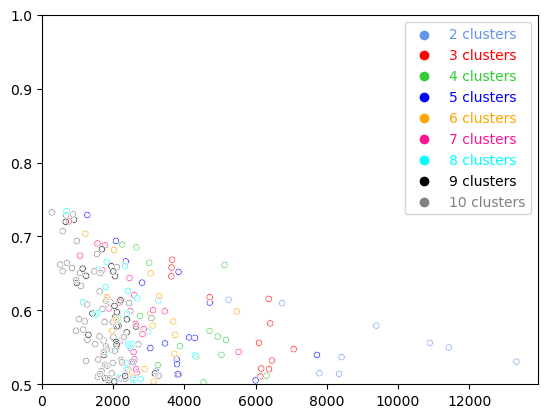

In [42]:
colors=['cornflowerblue','red','limegreen','blue','orange','deeppink','aqua','black','grey']
i=0

plot = sns.scatterplot(x=cluster_sizes, y=sex_disparities, hue=clusters_num, 
                palette=colors, 
               marker="$\circ$",s=60)
plt.ylim(0.5, 1)
plt.xlim(0, None)
legend = plot.legend(bbox_to_anchor= (1,1))
for text in legend.get_texts():
    text.set_color(colors[i])
    i+=1

plt.savefig('.../2-10 clusters - residuals data- brains.png',dpi=300, bbox_inches='tight')
plt.show()

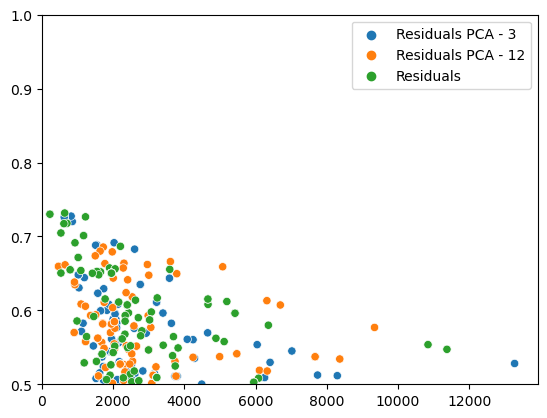

In [43]:
plot = sns.scatterplot(x=cluster_sizes, y=sex_disparities, hue=dim_reduction_method)
plt.ylim(0.5, 1)
plt.xlim(0, None)
legend = plot.legend(bbox_to_anchor= (1,1))
plt.savefig('.../2-10 clusters - residuals data- brains - dim.png',dpi=300, bbox_inches='tight')
plt.show()

In [44]:
sex_disparities = []
cluster_sizes = []
clusters_num = []
dim_reduction_method = []

clustering_2_10(images_reduced_brains_original_3,number_of_females,"Original Values PCA - 3")
clustering_2_10(images_reduced_brains_original_9,number_of_females,"Original Values PCA - 9")
clustering_2_10(df_original_data_balanced_norm,number_of_females,"Original Values")

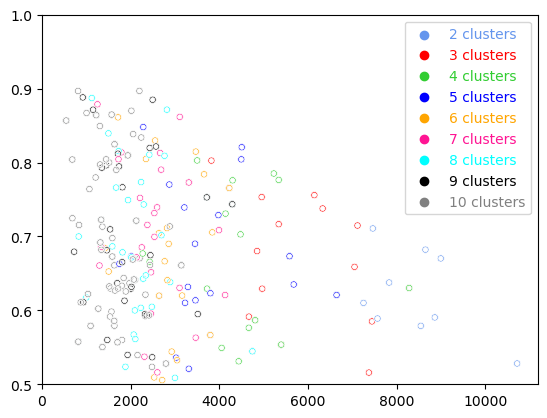

In [45]:
colors=['cornflowerblue','red','limegreen','blue','orange','deeppink','aqua','black','grey']
i=0

plot = sns.scatterplot(x=cluster_sizes, y=sex_disparities, hue=clusters_num, 
                palette=colors, 
               marker="$\circ$",s=60)
plt.ylim(0.5, 1)
plt.xlim(0, None)
legend = plot.legend(bbox_to_anchor= (1,1))
for text in legend.get_texts():
    text.set_color(colors[i])
    i+=1
plt.savefig('.../2-10 clusters - original data- brains.png',dpi=300, bbox_inches='tight')
plt.show()

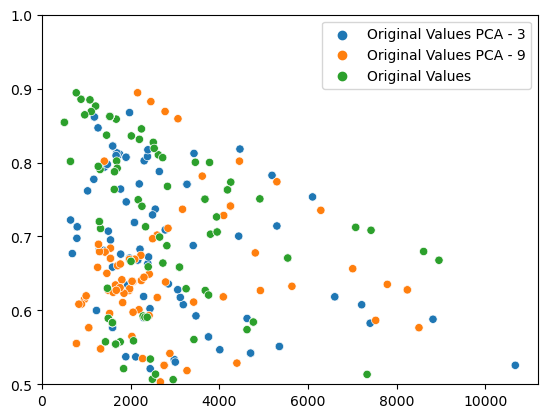

In [46]:
plot = sns.scatterplot(x=cluster_sizes, y=sex_disparities, hue=dim_reduction_method)
plt.ylim(0.5, 1)
plt.xlim(0, None)
legend = plot.legend(bbox_to_anchor= (1,1))
plt.savefig('.../2-10 clusters - original data- brains-dim.png',dpi=300, bbox_inches='tight')
plt.show()

<font size="5">Anomaly Detection:</font>

In [17]:
outlier_females = []
outlier_males = []
k = []
thresholds = []
males_or_females_train =[]
dim_reduction_method = []

def anomaly_detection(df,number_of_females,method):    
    for k in [30,35,40,45,50,55,60,65,70]:
        for percentile in [40,45,50,55,60,65,70,75]:
            males_train,males_test = train_test_split(df[:number_of_females,], test_size=0.5)
            females_train, females_test = train_test_split(df[number_of_females:,], test_size=0.5)
            # instantiate model males train
            nbrs = NearestNeighbors(n_neighbors = k)
             # fit model
            nbrs.fit(males_train)
            train_distances, indexes = nbrs.kneighbors(males_train)
            threshold = np.percentile(train_distances.mean(axis = 1), percentile)

            m_distances, indexes = nbrs.kneighbors(males_test)
            outlier_males.append(sum(m_distances.mean(axis = 1) > threshold)/(males_test.shape[0]))
            f_distances, indexes = nbrs.kneighbors(females_test)
            outlier_females.append(sum(f_distances.mean(axis = 1) > threshold)/(females_test.shape[0]))
            thresholds.append(threshold)
            males_or_females_train.append("trained on males")
            dim_reduction_method.append(method)

            # instantiate model females train
            nbrs = NearestNeighbors(n_neighbors = k)
            # fit model
            nbrs.fit(females_train)
            train_distances, indexes = nbrs.kneighbors(females_train)
            threshold = np.percentile(train_distances.mean(axis = 1), percentile)
            m_distances, indexes = nbrs.kneighbors(males_test)
            outlier_males.append(sum(m_distances.mean(axis = 1) > threshold)/(males_test.shape[0]))
            f_distances, indexes = nbrs.kneighbors(females_test)
            outlier_females.append(sum(f_distances.mean(axis = 1) > threshold)/(females_test.shape[0]))
            thresholds.append(threshold)  
            males_or_females_train.append("trained on females")
            dim_reduction_method.append(method)

In [18]:
np.random.seed(10)
anomaly_detection(images_reduced_brains_res_3,number_of_females,"Residuals PCA - 3")
anomaly_detection(images_reduced_brains_res_12,number_of_females,"Residuals PCA - 12")
anomaly_detection(df_residuals_data_balanced_norm,number_of_females,"Residuals - Z scores")

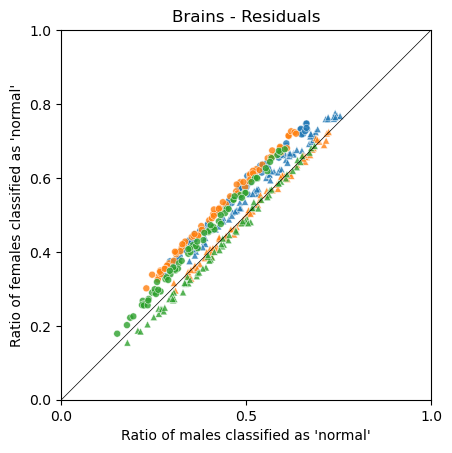

In [19]:
title = 'Brains - Residuals'
plot = sns.scatterplot(y = 1-np.array(outlier_females),
                       x = 1-np.array(outlier_males), hue=dim_reduction_method,
                         style=males_or_females_train, markers=["^","o"],s=25,alpha=0.8)
plot.set(ylabel="Ratio of females classified as 'normal'", 
         xlabel="Ratio of males classified as 'normal'",
        title = title)
plt.axis('square')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xticks([0, 0.5, 1])
plt.plot([0, 1], [0, 1],color='black', linewidth=0.5)
legend = plot.legend(bbox_to_anchor= (1,1))
fig  = legend.figure
fig.canvas.draw()
bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('.../anomaly detection legend- '+title+'.png', dpi=600, bbox_inches=bbox)
legend.remove()
plt.savefig('.../anomaly detection plot- '+title+'.png',dpi=300)

In [20]:
outlier_females = []
outlier_males = []
k = []
thresholds = []
males_or_females_train =[]
dim_reduction_method = []
     

np.random.seed(10)
anomaly_detection(images_reduced_brains_original_3,number_of_females,"Original Values PCA - 3")
anomaly_detection(images_reduced_brains_original_9,number_of_females,"Original Values PCA - 9")
anomaly_detection(df_original_data_balanced_norm,number_of_females,"Original Values - Z scores")

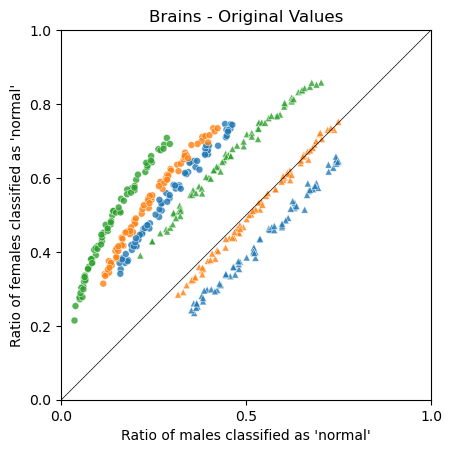

In [21]:
title = 'Brains - Original Values'
plot = sns.scatterplot(y = 1-np.array(outlier_females),
                       x = 1-np.array(outlier_males), hue=dim_reduction_method,
                         style=males_or_females_train, markers=["^","o"],s=25,alpha=0.8)
plot.set(ylabel="Ratio of females classified as 'normal'", 
         xlabel="Ratio of males classified as 'normal'",
        title = title)
plt.axis('square')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xticks([0, 0.5, 1])
plt.plot([0, 1], [0, 1],color='black', linewidth=0.5)
legend = plot.legend(bbox_to_anchor= (1,1))
fig  = legend.figure
fig.canvas.draw()
bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('.../anomaly detection legend- '+title+'.png', dpi=600, bbox_inches=bbox)
legend.remove()
plt.savefig('.../anomaly detection plot- '+title+'.png',dpi=300)